In [1]:
"""
Magic commands
"""
%matplotlib inline
%load_ext autoreload
%autoreload 2

"""
Python standard packages
"""
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


"""
Own packages
"""
sys.path.insert(0, "C:\\code\\speciale\\") # vesl path
sys.path.insert(0, "C:\\Users\\lucas\\OneDrive\\Skrivebord\\repo\\speciale\\") # ljb path

from market_simulation_study.agents import RandomAgent
from market_simulation_study.environment import MarketEnvironment


# Simulation 


## Setup

In [8]:
# Declare parameters
n_agents= 30
time_periods = 30000

price_list = [100 + np.random.normal() for j in range(100)]
ex_list = np.array([[0]*n_agents, [0]*n_agents])
fee = 0


state0 = {"market_prices": price_list, "execution_status": ex_list, 'fee':fee }
env = MarketEnvironment(state0)
agents = [RandomAgent(agent_id = j, latency = np.random.normal()) for j in range(n_agents)]



# Initialize agents
for j in range(n_agents):
        agents[j].update(state0)

## Run simulation

In [9]:
#fig, ax = plt.subplots(figsize = (12, 6))
#plot_data = pd.DataFrame({"time": None, "pnl": None, "agent_id": None}, index = [0])
for time in range(time_periods):
    state = env.step(agents)
    for j in range(n_agents):
        agents[j].update(state)
        #agents[j].calculate_profit_and_loss(state)
        #ax.scatter(time, agents[j].pnl)
        
    

156.4209749156727

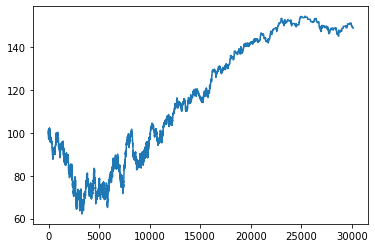

In [10]:
plt.plot(state['market_prices'])
np.maximum(agents[0].sell_price, 0)

# Performance overview

In [35]:
stats_df = pd.DataFrame({"Position":None, "PNL":None}, index = [0]).dropna()
for agent in agents:
    agent.calculate_profit_and_loss(state)
    df_temp = pd.DataFrame({"Position":agent.position, "PNL": agent.pnl}, index = [agent.agent_id])
    stats_df = stats_df.append(df_temp)

print("PNL SUM: ", stats_df["PNL"].sum())
stats_df


PNL SUM:  3.979039320256561e-13


,Position,PNL
0,17,-134.994083
1,20,65.240607
2,-7,-9.926754
3,27,-12.100289
4,-18,72.149368
5,-22,60.415505
6,13,-44.391086
7,-8,6.872919
8,-10,145.577711
9,-4,-27.286304
